In [138]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
from PIL import Image
from tensorflow import keras
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [139]:
os.chdir('C:\\Users\\ankur')

In [140]:
os.getcwd()

'C:\\Users\\ankur'

In [141]:
os.path.dirname('C:\\Users\\ankur\\TRAIN')

'C:\\Users\\ankur'

In [142]:
os.path.exists('C:\\Users\\ankur\\TEST')

True

In [143]:
train_path = 'C:\\Users\\ankur\\TRAIN'
test_path = 'C:\\Users\\ankur\\TEST'
features_name = os.listdir(train_path)
features = {}
for n, f in enumerate(features_name):
    features[n] = f
print(features)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [144]:
import pathlib
train_path = pathlib.Path(train_path)
test_path = pathlib.Path(test_path)
train_image_count = len(list(train_path.glob('*/*.jpg')))
test_image_count = len(list(test_path.glob('*/*.jpg')))
print(train_image_count)
print(test_image_count)

2001
300


In [146]:
batch = 20
img_height = 255
img_width = 255

In [147]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_path, validation_split = 0.1, image_size = (img_height, img_width), batch_size = batch, seed = 0, subset = 'training')

Found 2001 files belonging to 6 classes.
Using 1801 files for training.


In [148]:
train_ds

<BatchDataset shapes: ((None, 255, 255, 3), (None,)), types: (tf.float32, tf.int32)>

In [149]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(train_path, validation_split = 0.1, image_size = (img_height, img_width), batch_size = batch, seed = 0, subset = 'validation')

Found 2001 files belonging to 6 classes.
Using 200 files for validation.


In [166]:
test = ImageDataGenerator(rescale = 1./255 , validation_split = 0.1)
test_ds = test.flow_from_directory(test_path,target_size=(128,128),batch_size=batch,class_mode='categorical',subset='validation')

Found 30 images belonging to 1 classes.


In [151]:
def create_dataset(img_path):
    img_arr = []
    features_arr = []
    for fold in os.listdir(img_path):
        for file in os.listdir(os.path.join(img_path, fold)):
            
            file_path = os.path.join(img_path,fold,file)
            image = cv2.imread(file_path)
            image = cv2.resize(image, (250, 250))
            image = np.array(image)
            image = image.astype('float32')
            image = image/255
            img_arr.append(image)
        features_arr.append(fold)
    return img_arr, features_arr

img_data, feature_name = create_dataset(train_path)

In [152]:
test_ds = []
for file in os.listdir(test_path):
    test_file_path = os.path.join(test_path, file)
    image = cv2.imread(test_file_path)
    image = cv2.resize(image, (250, 250))
    image = np.array(image)
    image = image.astype('float32')
    image = image/255
    test_ds.append(image)

In [153]:
target_dict={k: v for v, k in enumerate(np.unique(feature_name))}
target_dict

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [154]:
features_val = [target_dict[feature_name[i]] for i in range(len(feature_name))]
features_val = tf.stack(features_val)
print(features_val)

tf.Tensor([0 1 2 3 4 5], shape=(6,), dtype=int32)


In [155]:
print(img_data[0])

[[[0.72156864 0.84313726 0.93333334]
  [0.72156864 0.84705883 0.93333334]
  [0.7294118  0.8509804  0.9372549 ]
  ...
  [0.6392157  0.7411765  0.8039216 ]
  [0.63529414 0.7372549  0.8       ]
  [0.6313726  0.73333335 0.8       ]]

 [[0.72156864 0.84313726 0.93333334]
  [0.72156864 0.84313726 0.93333334]
  [0.7294118  0.84705883 0.9372549 ]
  ...
  [0.6392157  0.7372549  0.80784315]
  [0.6313726  0.73333335 0.8039216 ]
  [0.6313726  0.73333335 0.8       ]]

 [[0.72156864 0.84313726 0.93333334]
  [0.72156864 0.84705883 0.93333334]
  [0.7294118  0.8509804  0.9372549 ]
  ...
  [0.6392157  0.7411765  0.8039216 ]
  [0.6313726  0.73333335 0.8039216 ]
  [0.6313726  0.73333335 0.8       ]]

 ...

 [[0.8039216  0.92156863 0.99607843]
  [0.8039216  0.92156863 0.99607843]
  [0.8039216  0.92156863 0.99607843]
  ...
  [0.65882355 0.7764706  0.84313726]
  [0.6509804  0.76862746 0.8352941 ]
  [0.6039216  0.72156864 0.7882353 ]]

 [[0.80784315 0.9254902  1.        ]
  [0.80784315 0.9254902  1.        ]


In [156]:
len(img_data[0])

250

In [157]:
feature_name

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

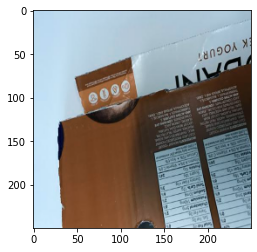

In [158]:
plt.imshow(img_data[0])

In [159]:
#img_data = tf.stack(img_data)

In [160]:
model = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape= (img_height, img_width, 3)) ,
            tf.keras.layers.Conv2D(filters = 32, strides = (2,2), activation = 'relu', kernel_size = 3),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Conv2D(filters = 64, strides = (2,2), activation = 'relu', kernel_size = 3),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Conv2D(filters = 64, strides = (2,2), activation = 'relu', kernel_size = 3),
            tf.keras.layers.MaxPooling2D(),
            #tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, activation = 'relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(6, activation = 'sigmoid')
            
        ]


)
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 127, 127, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)              

In [161]:
history = model.fit(x = train_ds, validation_data = val_ds, epochs = 10)

Epoch 1/10
91/91 [==============================] - 15s 161ms/step - loss: 7.0272 - accuracy: 0.2193 - val_loss: 1.8022 - val_accuracy: 0.2000
Epoch 2/10
91/91 [==============================] - 14s 157ms/step - loss: 1.7457 - accuracy: 0.2338 - val_loss: 1.6650 - val_accuracy: 0.2650
Epoch 3/10
91/91 [==============================] - 15s 162ms/step - loss: 1.6582 - accuracy: 0.2748 - val_loss: 1.5837 - val_accuracy: 0.2800
Epoch 4/10
91/91 [==============================] - 16s 170ms/step - loss: 1.6366 - accuracy: 0.3104 - val_loss: 1.6285 - val_accuracy: 0.3500
Epoch 5/10
91/91 [==============================] - 16s 177ms/step - loss: 1.5583 - accuracy: 0.3359 - val_loss: 1.4898 - val_accuracy: 0.3550
Epoch 6/10
91/91 [==============================] - 21s 229ms/step - loss: 1.4936 - accuracy: 0.3631 - val_loss: 1.4722 - val_accuracy: 0.3350
Epoch 7/10
91/91 [==============================] - 15s 159ms/step - loss: 1.5498 - accuracy: 0.3592 - val_loss: 1.4954 - val_accuracy: 0.3500

In [165]:
score = model.evaluate(val_ds)

10/10 [==============================] - 1s 48ms/step - loss: 1.4554 - accuracy: 0.3700
[1.455367922782898, 0.3700000047683716]


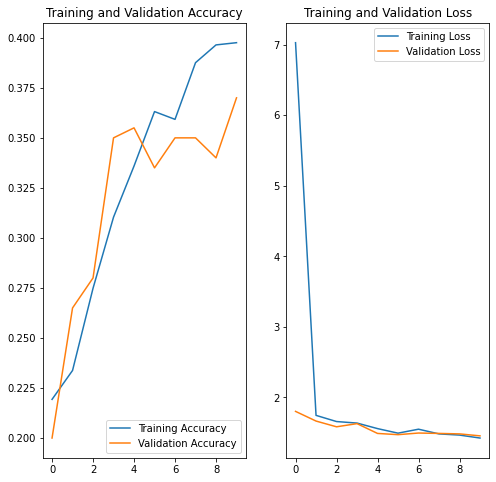

In [163]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [167]:
y = model.predict(test_ds[0])

ValueError: in user code:

    C:\Users\ankur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    C:\Users\ankur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ankur\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ankur\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ankur\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ankur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    C:\Users\ankur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    C:\Users\ankur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\ankur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:203 assert_input_compatibility
        ' input tensors. Inputs received: ' + str(inputs))

    ValueError: Layer sequential_3 expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 128, 128, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 1) dtype=float32>]
